# Front Matter: CASA0013: Foundations of Spatial Data Science

## Visualize the distribution of Airbnb listings in London and explore the impact of Airbnb on the London housing market

### Student ID :20189876


# Reproducible Analysis

### 1 Find London MSOAs

In [1]:
import os
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches

<AxesSubplot:>

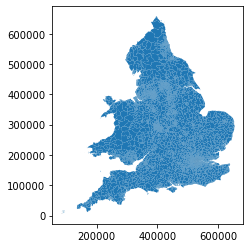

In [2]:
#LOAD MSOAS
msoas = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2-shp.zip?raw=true')
msoas.plot()

In [3]:
#Grab the Borough Boundaries
boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')
boros

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,"MULTIPOLYGON (((516401.600 160201.800, 516407...."
1,Croydon,E09000008,8649.441,0.000,F,"MULTIPOLYGON (((535009.200 159504.700, 535005...."
2,Bromley,E09000006,15013.487,0.000,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."
3,Hounslow,E09000018,5658.541,60.755,F,"MULTIPOLYGON (((521975.800 178100.000, 521967...."
4,Ealing,E09000009,5554.428,0.000,F,"MULTIPOLYGON (((510253.500 182881.600, 510249...."
5,Havering,E09000016,11445.735,210.763,F,"MULTIPOLYGON (((549893.900 181459.800, 549894...."
6,Hillingdon,E09000017,11570.063,0.000,F,"MULTIPOLYGON (((510599.800 191689.500, 510615...."
7,Harrow,E09000015,5046.330,0.000,F,"MULTIPOLYGON (((510599.800 191689.500, 510660...."
8,Brent,E09000005,4323.270,0.000,F,"MULTIPOLYGON (((525201.000 182512.600, 525181...."
9,Barnet,E09000003,8674.837,0.000,F,"MULTIPOLYGON (((524579.900 198355.200, 524594...."


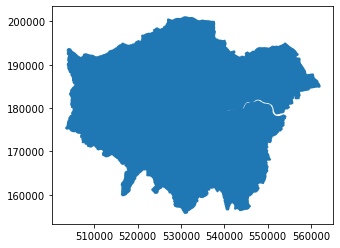

In [4]:
ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})

# get all MSOAs _within_ London 
# buffer the boundary by 250m.
ldn['geometry'] = ldn.original.buffer(250)
ldn = ldn.set_geometry('geometry')
ldn.plot();

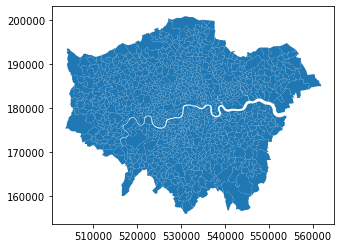

In [5]:
ldn_msoas = gpd.sjoin(msoas, ldn, op='within')
ldn_msoas.plot();

In [6]:
del(msoas)

In [7]:
#Extract Borough Names

ldn_msoas['Borough'] = ldn_msoas.MSOA11NM.str.replace(r' \d+$','',regex=True)

# - 33 boroughs
# - A df shape of 983 x 14
print(ldn_msoas.Borough.unique())
print(len(ldn_msoas.Borough.unique()))
print(ldn_msoas.shape)


['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster']
33
(983, 14)


In [8]:
#Add MSOA Names

msoa_nms = pd.read_csv('https://github.com/jreades/i2p/blob/master/data/src/MSOA-Names-1.8.csv.gz?raw=true', compression='gzip')
print(msoa_nms.columns.values)
msoa_nms.sample(3, random_state=42)

msoas = pd.merge(ldn_msoas, msoa_nms, left_on='MSOA11CD', right_on='msoa11cd', how='inner')
print(msoas.shape)
print(type(msoas)) # You should check this -- result isn't always be a GeoDataFrame
msoas.sample(3, random_state=42)[['OBJECTID','MSOA11CD','MSOA11NM','msoa11hclnm']]

['msoa11cd' 'msoa11nm' 'msoa11nmw' 'msoa11hclnm' 'msoa11hclnmw' 'Laname']
(983, 20)
<class 'geopandas.geodataframe.GeoDataFrame'>


,OBJECTID,MSOA11CD,MSOA11NM,msoa11hclnm
810,811,E02000841,Sutton 002,St Helier South
801,802,E02000832,Southwark 026,Nunhead North
813,814,E02000844,Sutton 005,The Wrythe


In [9]:
#Tidy up

to_drop = ['MSOA11NMW','LONG','LAT','Shape__Are','Shape__Len','index_right',
           'original','msoa11cd','msoa11nm','msoa11nmw','Laname','msoa11hclnmw']
msoas.drop(columns=to_drop, inplace=True)
print(msoas.shape)

(983, 8)


In [10]:
#save

#msoas.to_file(os.path.join('data','London_MSOAs.gpkg'), driver='GPKG')

<AxesSubplot:>

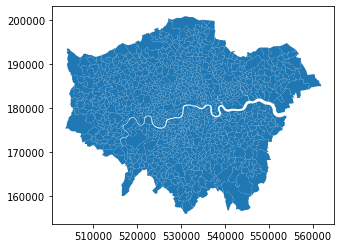

In [11]:
msoas.plot()

### 2 Load InsideAirbnb Data

In [ ]:
cols = ['id','name','price','latitude','longitude','property_type','room_type','availability_365','host_listings_count']
url = 'http://data.insideairbnb.com/united-kingdom/england/london/2021-10-10/data/listings.csv.gz'

df = pd.read_csv(url, usecols=cols, low_memory=False )

In [ ]:
df

In [ ]:
#data cleaning
#clean price,latitude,longitude,host_listings_count,availability_365
df['price'] = df.price.str.replace('$','').str.replace(',','').astype(float)
df.drop(df[((df.latitude.isna())|(df.longitude.isna()))].index, axis=0, inplace=True)
df.drop(df[((df.latitude < 40)|(df.longitude > 1))].index, axis=0, inplace=True)
df.drop(df[((df.host_listings_count.isna())|(df.availability_365.isna()))].index, axis=0, inplace=True)
print(df.shape)

In [ ]:
#data cleaning
#clean property_type,room_type
cats = ['property_type','room_type']


In [ ]:
df[cats[0]].value_counts()

In [ ]:
df[cats[1]].value_counts()

In [ ]:
for c in cats:
    df[c] = df[c].astype('category')

In [ ]:
#clean availability_365,host_listings_count as interger
ints  = ['availability_365','host_listings_count']
for i in ints:
    print(f"Converting {i}")
    try:
        df[i] = df[i].astype('float').astype('int')
    except ValueError as e:
        print("\tConverting to unsigned 16-bit integer.")
        df[i] = df[i].astype('float').astype(pd.UInt16Dtype())

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
#save cleaned data
df.to_csv('clean.csv')

### 3 Preliminary analysis and Visualising Data

In [ ]:
url = 'https://raw.githubusercontent.com/mrborin/i2p/main/clean1.csv'

df = pd.read_csv(url, low_memory=False )

In [ ]:
#Add Geometry and Reproject

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude, crs='epsg:4326'))
gdf = gdf.to_crs('epsg:27700')

In [ ]:
#drop avaliable days <0(=0day,which means not avaliable)
gdf1 = gdf.drop(gdf[(gdf.availability_365 < 1)].index, axis=0, inplace=False)

In [ ]:
gdf1.describe()

In [ ]:
gdf1.info()

In [ ]:
#value counts of avaliable days in future 365 days
gdf1.availability_365.value_counts()

In [ ]:
#select avaliable days>180
over_180 = (gdf1.availability_365 >180 ).sum()

In [ ]:
#Associate LA (Local Authority) names to the listings using a spatial join
gdf1_la = gpd.sjoin(gdf1, boros, op='within', how='left')
print(gdf1_la.columns.values)
gdf1_la

In [ ]:
#Tidy Up
gdf1_la.drop(columns=['index_right','HECTARES','NONLD_AREA','ONS_INNER'], inplace=True)
gdf1_la.NAME.unique()

In [ ]:
#Tidy Up
gdf1[gdf1_la.NAME.isna()][['id','name']]
ax = gdf1_la[gdf1_la.NAME.isna()].plot()
boros.plot(ax=ax, edgecolor='r', facecolor='None', alpha=0.5)

In [ ]:
#Tidy Up
gdf1_la.drop(index=gdf1[gdf1_la.NAME.isna()].index, axis=1, inplace=True)
print(gdf1_la.shape)

In [ ]:
#map1 airbnb all avaliable room map
ax = gdf1_la.plot(column='NAME', markersize=0.5, alpha=0.8, figsize=(15,10))
boros.plot(ax=ax, edgecolor='r', facecolor='None', alpha=0.5);
plt.axis('off')
plt.title('(a)  Airbnb all avaliable rooms in London', fontsize=16)

In [ ]:
#over 180 
gdf1_la_ov180 = gdf1_la.drop(gdf1_la[(gdf1_la.availability_365 < 180)].index, axis=0, inplace=False)

In [ ]:
#the pecentage of over 180 days in all airbnb rooms
gdf1_la_ov180.describe()
over180_rate=17376/34929
over180_rate

In [ ]:
#map2 airbnb avaliable days>180 rooms map
ax = gdf1_la_ov180.plot(column='NAME', markersize=0.5, alpha=0.8, figsize=(15,10))
boros.plot(ax=ax, edgecolor='r', facecolor='None', alpha=0.5);
plt.axis('off')
plt.title('(b) Airbnb avaliable days>180 rooms in London', fontsize=16)

In [ ]:
#MISUSE: over 180 and host_listings_count>1
gdf1_la_misuse = gdf1_la.drop(gdf1_la[((gdf1_la.availability_365 < 180) | (gdf1_la.host_listings_count > 1))].index, axis=0, inplace=False)
gdf1_la_misuse.describe()

In [ ]:
#High likelihood of misuse ratio
misuse_rate=7147/34929
misuse_rate

In [ ]:
#map3 airbnb misuse rooms map
ax = gdf1_la_misuse.plot(column='NAME', markersize=0.8, alpha=1, figsize=(15,10))
boros.plot(ax=ax, edgecolor='r', facecolor='None', alpha=0.3);
plt.axis('off')
plt.title('(c) Airbnb misuse rooms in London', fontsize=18)

In [ ]:
gdf1_la_misuse.NAME.unique()

In [ ]:
#all avaliable in LSOA level
msoadf  = gpd.sjoin(
            gdf1_la, msoas, op='within')
msoadf.head()

In [ ]:
msoagrdf = msoadf.groupby('MSOA11NM').size().reset_index(name='counts')
msoagrdf

In [ ]:
msoa_gdf = msoagrdf.set_index('MSOA11NM').join(
                msoas.set_index('MSOA11NM'), 
                rsuffix='_r')
msoa_gdf.head(3)

In [ ]:
#map4 airbnb rooms map in msoa
msoa_gdf = msoa_gdf.set_geometry('geometry')
msoa_gdf.plot(column='counts', markersize=0.5, legend=True, alpha=1, cmap='plasma',scheme='FisherJenks',k=10,figsize=(15,10))
msoa_all_avaliable = msoa_gdf
#ldn_msoas.plot(ax=ax, edgecolor='r', facecolor='None', alpha=0.1);
plt.axis('off')
plt.title('(a) Airbnb avaliable rooms map in different MSOA', fontsize=18)

In [ ]:
#map5 airbnb misuse rooms map in msoa

msoadf  = gpd.sjoin(
            gdf1_la_misuse, msoas, op='within')
msoagrdf = msoadf.groupby('MSOA11NM').size().reset_index(name='counts')
msoa_gdf = msoagrdf.set_index('MSOA11NM').join(
                msoas.set_index('MSOA11NM'), 
                rsuffix='_r')

#mapping
msoa_gdf = msoa_gdf.set_geometry('geometry')
msoa_gdf.plot(column='counts',cmap='plasma',scheme='FisherJenks',k=10, legend=True, alpha=1, figsize=(15,10))
msoa_misuse = msoa_gdf
plt.axis('off')
plt.title('(b) Airbnb misuse rooms map in different MSOA', fontsize=18)

In [ ]:
msoa_misuse

In [ ]:
#map6 airbnb over180 rooms map in msoa

msoadf  = gpd.sjoin(
            gdf1_la_ov180, msoas, op='within')
msoagrdf = msoadf.groupby('MSOA11NM').size().reset_index(name='counts')
msoa_gdf = msoagrdf.set_index('MSOA11NM').join(
                msoas.set_index('MSOA11NM'), 
                rsuffix='_r')

#mapping
msoa_gdf = msoa_gdf.set_geometry('geometry')
msoa_gdf.plot(column='counts', legend=True, alpha=1, cmap='plasma',scheme='FisherJenks',k=10,figsize=(15,10))
plt.axis('off')

## 3 Explore how the airbnb misuse impact London house prices

In [ ]:
#load london house price data
cols = ['Local authority code','Local authority name','MSOA code','MSOA name','Year ending Dec 2013','Year ending Mar 2014','Year ending Jun 2014','Year ending Sep 2014','Year ending Dec 2014','Year ending Dec 2020','Year ending Mar 2021']
url = 'https://raw.githubusercontent.com/mrborin/i2p/main/london%20Median%20price%20paid%20by%20MSOA.csv'

df_lhp = pd.read_csv(url, usecols=cols, skiprows=5, low_memory=False,thousands=',' )

In [ ]:
df_lhp.rename(columns={'MSOA code':'MSOA11CD'},inplace=True)

In [ ]:
#df_lhp.describe()

In [ ]:
#join housse price data

house_price_airbnb_all = msoa_all_avaliable.merge(df_lhp, on='MSOA11CD', how='left')

In [ ]:
#house_price_airbnb_all.info()
house_price_airbnb_all.describe()
house_price_airbnb_all

In [ ]:
#tidy up
house_price_airbnb_all.rename(columns={'Local authority code':'Local_authority_code','Local authority name':'Local_authority_name','MSOA name':'MSOA_name','Year ending Dec 2013':'Year_ending_Dec_2013','Year ending Mar 2014':'Year_ending_Mar_2014','Year ending Jun 2014':'Year_ending_Jun_2014','Year ending Sep 2014':'Year_ending_Sep_2014','Year ending Dec 2014':'Year_ending_Dec_2014','Year ending Dec 2020':'Year_ending_Dec_2020','Year ending Mar 2021':'Year_ending_Mar_2021',},inplace=True)

In [ ]:
house_price_airbnb_all['price_change'] = house_price_airbnb_all.Year_ending_Mar_2021 - house_price_airbnb_all.Year_ending_Mar_2014
house_price_airbnb_all['price_change_rate'] = (house_price_airbnb_all.Year_ending_Mar_2021 - house_price_airbnb_all.Year_ending_Mar_2014)/house_price_airbnb_all.Year_ending_Mar_2014

In [ ]:
#map7 house prices map
house_price_airbnb_all = house_price_airbnb_all.set_geometry('geometry')
house_price_airbnb_all.plot(column='Year_ending_Mar_2021', legend=True, alpha=1, cmap='plasma',scheme='FisherJenks',k=10,figsize=(15,10))
plt.axis('off')
plt.title('(a) London median house prices map', fontsize=18)

In [ ]:
#map8 house prices change map
house_price_airbnb_all = house_price_airbnb_all.set_geometry('geometry')
house_price_airbnb_all.plot(column='price_change', legend=True, alpha=1,cmap='plasma',scheme='FisherJenks',k=10, figsize=(15,10))
plt.axis('off')

In [ ]:
#map8.1 house prices change rate map
house_price_airbnb_all = house_price_airbnb_all.set_geometry('geometry')
house_price_airbnb_all.plot(column='price_change_rate', legend=True, alpha=1, cmap='plasma',scheme='FisherJenks',k=10,figsize=(15,10))
plt.axis('off')

### 3.1 Build the model

In [ ]:
#tidy up
msoa_misuse.rename(columns={'counts':'counts_misuse'},inplace=True)
house_price_airbnb_all.rename(columns={'counts':'counts_all_avaliable'},inplace=True)


In [ ]:
#tidy up
hp_allc_misusec = house_price_airbnb_all.merge(msoa_misuse[['counts_misuse','MSOA11CD']], on='MSOA11CD', how='left')

In [ ]:
#tidy up
hp_allc_misusec.dropna(axis=0,how='any')

In [ ]:
#hp_allc_misusec.describe()

In [ ]:
#drop the outlier
df_clean = hp_allc_misusec.drop(hp_allc_misusec[hp_allc_misusec.price_change == -450000.0].index)

In [ ]:
df_clean.describe()

In [ ]:
#map9 house prices change map without the outlier
df_clean = df_clean.set_geometry('geometry')
df_clean.plot(column='price_change', legend=True, alpha=1, cmap='plasma',scheme='FisherJenks',k=10,figsize=(15,10))
plt.axis('off')

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

In [ ]:
#new1 dataset preparing for correlation check and build model1
new1 = pd.DataFrame(df_clean, columns=['counts_all_avaliable','counts_misuse','price_change','price_change_rate','Year_ending_Mar_2021'])
new1.dropna(axis=0,how='any',inplace=True)
new1.describe()

In [ ]:
#pd.set_option('display.max_rows',150)
#new1.counts_all_avaliable.value_counts()

In [ ]:
#Checking the correlation between variables
df = new1
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(10, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [ ]:
#model1 how airbnb misuse impact london house prices
regression_result = sm.OLS(endog=new1[['Year_ending_Mar_2021']], exog=sm.add_constant(new1.drop(columns=['price_change','price_change_rate','counts_all_avaliable','Year_ending_Mar_2021']))).fit()
regression_result.summary()

In [ ]:
#model1.2 how airbnb rooms avaliability impact london house prices
regression_result = sm.OLS(endog=new1[['Year_ending_Mar_2021']], exog=sm.add_constant(new1.drop(columns=['price_change','price_change_rate','counts_misuse','Year_ending_Mar_2021']))).fit()
regression_result.summary()

In [ ]:
#model2
#select avaliable>21
new2 = pd.DataFrame(df_clean, columns=['counts_all_avaliable','counts_misuse','price_change','price_change_rate','Year_ending_Mar_2021'])
new2.dropna(axis=0,how='any',inplace=True)
new2.drop(new2[new2.counts_all_avaliable < 21].index,inplace=True)
new2

In [ ]:
#model2 how airbnb impact house price in the area airbnb avaliable >21(50%)
regression_result = sm.OLS(endog=new2[['Year_ending_Mar_2021']], exog=sm.add_constant(new2.drop(columns=['price_change','price_change_rate','counts_all_avaliable','Year_ending_Mar_2021']))).fit()
regression_result.summary()

## 4 Explore how the airbnb impact London private rental prices

In [ ]:
#load london private rental market statistics 211215
cols = ['Local_authority_code','Area','Count_of_rents','Median']
url = 'https://raw.githubusercontent.com/mrborin/i2p/main/privaterentalmarketstatistics211215.csv'
df_retal_market = pd.read_csv(url, usecols=cols, low_memory=False,thousands=',' )

In [ ]:
#drop null
df_retal_market.dropna(axis=0,how='any',inplace=True)

In [ ]:
df_retal_market.describe()
df_clean

In [ ]:
#join borough 
df_all = df_clean.merge(df_retal_market, on='Local_authority_code', how='left')

In [ ]:
#rename
df_all.rename(columns={'Count_of_rents':'boough_Count_of_rents','Median':'boough_median_rent_price'},inplace=True)

In [ ]:
#drop null
df_all.dropna(axis=0,how='any',inplace=True)

In [ ]:
#add all_avaliable_rate and misuse_rate
df_all['all_avaliable_rate'] = df_all['counts_all_avaliable']/df_all['boough_Count_of_rents']
df_all['misuse_rate'] = df_all['counts_misuse']/df_all['boough_Count_of_rents']

In [ ]:
df_all.describe()

In [ ]:
#model 3 how airbnb all avaliable rate impact house rental prices
regression_result = sm.OLS(endog=df_all[['boough_median_rent_price']], exog=sm.add_constant(df_all[['counts_all_avaliable']])).fit()
regression_result.summary()

In [ ]:
#model 4 how airbnb misuse impact london rental price 
new_borough = df_clean.groupby(by=['Local_authority_code'])['counts_all_avaliable','counts_misuse'].sum()
new_borough

In [ ]:
#merge london private rental market dataset 
#in borough level
df_all_borough = new_borough.merge(df_retal_market, on='Local_authority_code', how='left')
df_all_borough.rename(columns={'Count_of_rents':'boough_Count_of_rents','Median':'boough_median_rent_price'},inplace=True)
df_all_borough['all_avaliable_rate'] = df_all_borough['counts_all_avaliable']/df_all_borough['boough_Count_of_rents']
df_all_borough['misuse_rate'] = df_all_borough['counts_misuse']/df_all_borough['boough_Count_of_rents']
df_all_borough

In [ ]:
#preapare log data just in case
df_all_borough['boough_Count_of_rents_log'] = df_all_borough['boough_Count_of_rents'].apply(np.log)
df_all_borough['all_avaliable_rate_log'] = df_all_borough['all_avaliable_rate'].apply(np.log)
df_all_borough['misuse_rate_log'] = df_all_borough['misuse_rate'].apply(np.log)
df_all_borough

In [ ]:
#build model4 - in borough level how misuse impat rental prices
regression_result = sm.OLS(endog=df_all_borough[['boough_median_rent_price']], exog=sm.add_constant(df_all_borough[['counts_misuse']])).fit()
regression_result.summary()

### Reflact: Explore how Airbnb impact rental market visualizing in borough level

In [ ]:
#Geographicization airbnb and rental market dataset
gdf_df_all_borough = pd.merge(df_all_borough, boros, left_on='Local_authority_code', right_on='GSS_CODE', how='left')
gdf_df_all_borough

In [ ]:
#map10 london rental median prices
gdf_df_all_borough = gdf_df_all_borough.set_geometry('geometry')
gdf_df_all_borough.plot(column='boough_median_rent_price', legend=True, alpha=1,cmap='plasma',scheme='FisherJenks',k=6, figsize=(15,10))
plt.title('(b) London Median private rent price', fontsize=18)
plt.axis('off')

In [ ]:
#map11 london airbnb avaliability
gdf_df_all_borough = gdf_df_all_borough.set_geometry('geometry')
gdf_df_all_borough.plot(column='all_avaliable_rate', legend=True, alpha=1, cmap='plasma',scheme='FisherJenks',k=6,figsize=(15,10))
plt.title('(a) Airbnb rooms avaliability in different boroughs', fontsize=18)
plt.axis('off')

In [ ]:
#map11 london airbnb misuse
gdf_df_all_borough = gdf_df_all_borough.set_geometry('geometry')
gdf_df_all_borough.plot(column='misuse_rate', legend=True, alpha=1, cmap='plasma',scheme='FisherJenks',k=6, figsize=(15,10))
plt.title('(b) Airbnb rooms misuse in different boroughs', fontsize=18)
plt.axis('off')